In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

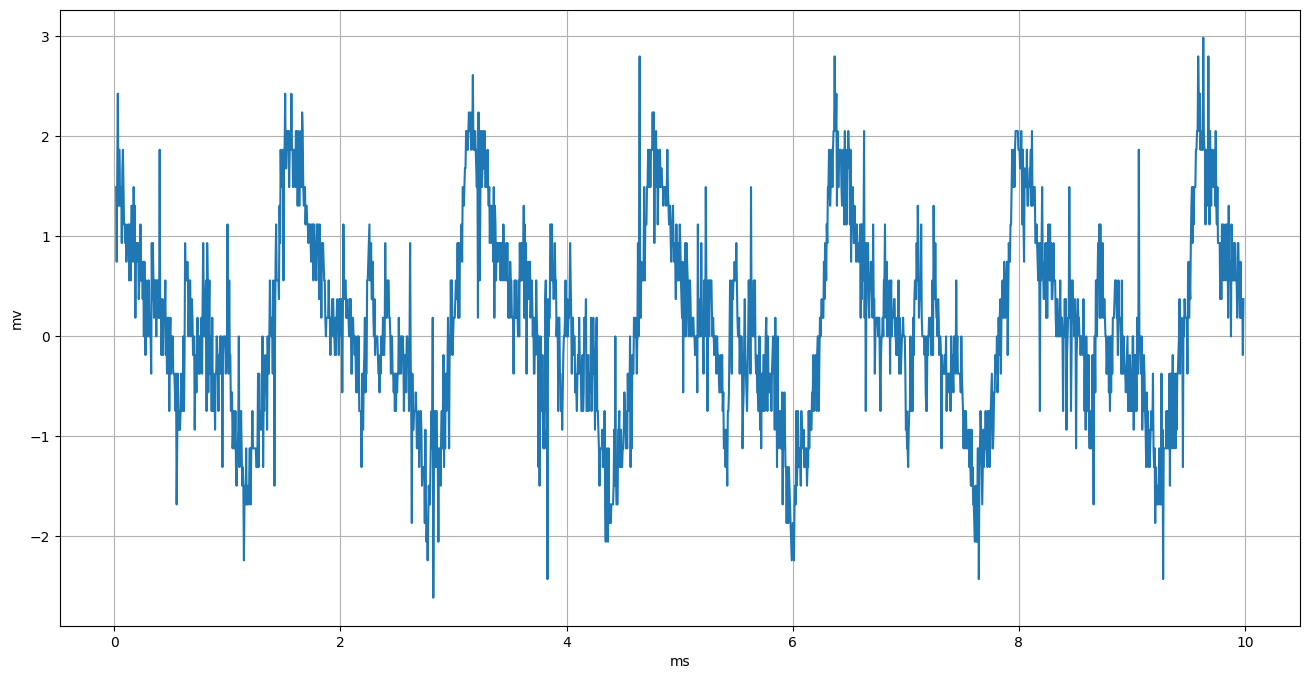

In [3]:
# Nr.1

inputCSV_path = "./MessungenVersuch3/Versuch_1_Ton-0001/Versuch_1_Ton-0001_06.csv"

with open(inputCSV_path, "r") as f:
    lines = f.read().splitlines()[3:]

temp = []
for x in lines:
    temp.append([float(y.replace(",", ".")) for y in x.split(";")])
lines = temp.copy()

ms = []
mv = []
for x in lines:
    ms.append(x[0])
    mv.append(x[1])

plt.figure(figsize=(16, 8))
plt.plot(ms[5005:7000], mv[5005:7000])
plt.xlabel("ms")
plt.ylabel("mv")
plt.grid(True)
plt.show()

In [4]:
print("Grundperiode ≈ 7.85 - 6.25 = 1.6 (ms)")
print("Grundfrequenz ≈ 1000 / 1.6 = 625 (Hz)")
print("Signaldauer =  25.00499968 - (-25.00999905) = 0.050014999 (s)")
print("Abtastfrequenz = 1000 / (25.00499968 - 24.99999968) = 1000 / 0.005 = 200'000 (Hz)")
print("Signallänge M = 0.050014999 / 0.000005 = 10'003")
print("Abtastintervall Δt = 0.000005 (s)")

Grundperiode ≈ 7.85 - 6.25 = 1.6 (ms)
Grundfrequenz ≈ 1000 / 1.6 = 625 (Hz)
Signaldauer =  25.00499968 - (-25.00999905) = 0.050014999 (s)
Abtastfrequenz = 1000 / (25.00499968 - 24.99999968) = 1000 / 0.005 = 200'000 (Hz)
Signallänge M = 0.050014999 / 0.000005 = 10'003
Abtastintervall Δt = 0.000005 (s)


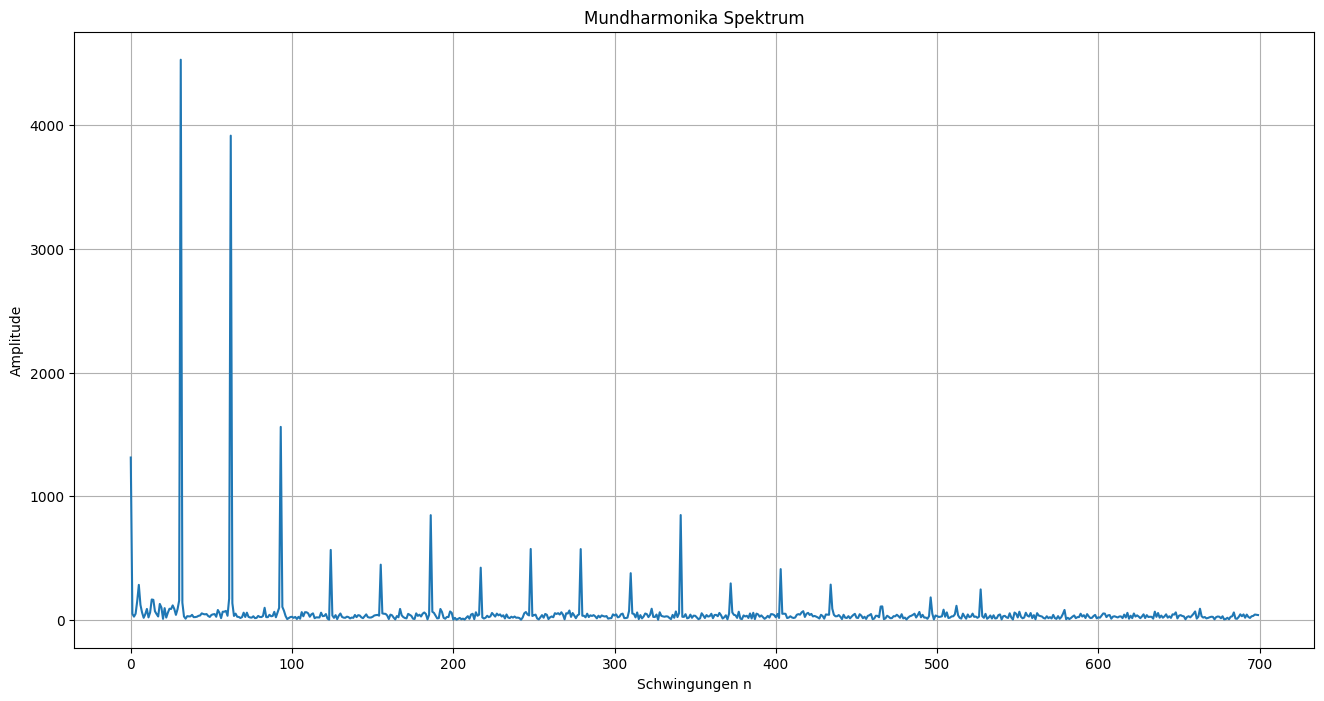

In [5]:
# Nr.2

mv_array = np.array(mv)
fft_values = np.fft.fft(mv_array)
waves = list(range(0, len(fft_values)))


plt.figure(figsize=(16, 8))
plt.plot(waves[:700], np.abs(fft_values[:700]))
plt.xlabel("Schwingungen n")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Mundharmonika Spektrum")
plt.show()

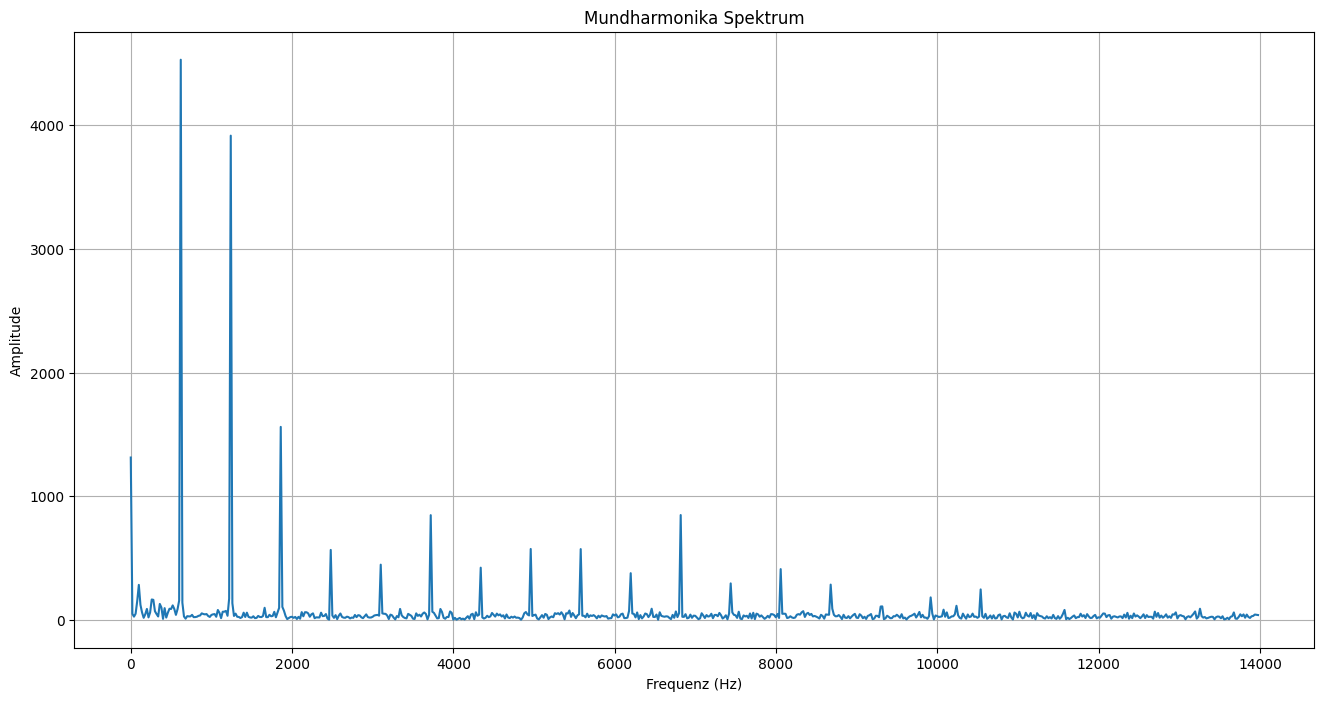

In [6]:
waves = list(range(0, len(fft_values)))
m = 10003.
dt = 0.000005
hz = [n / (m * dt)for n in waves]

plt.figure(figsize=(16, 8))
plt.plot(hz[:700], np.abs(fft_values[:700]))
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Mundharmonika Spektrum")
plt.show()

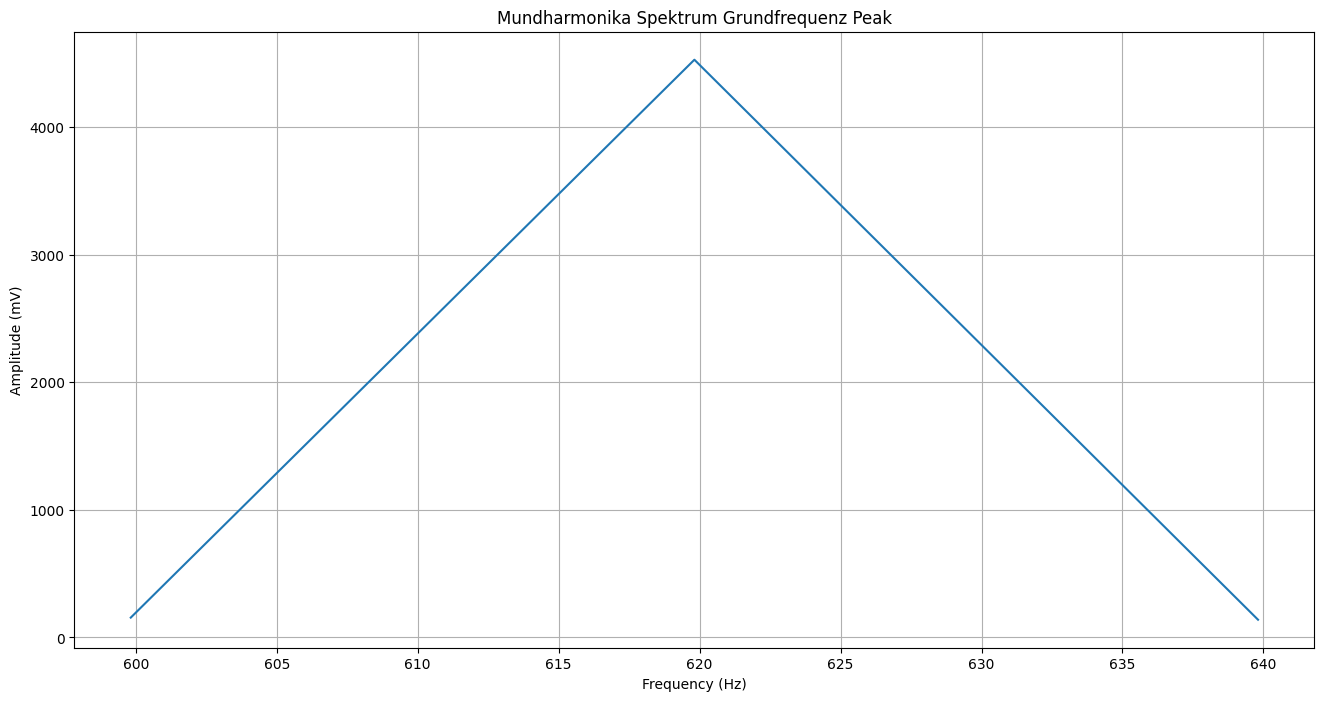

Grundfrequenz ≈ 619.5 (Hz)
Amplitude ≈ 4'568 (mV)


In [7]:
plt.figure(figsize=(16, 8))
plt.plot(hz[30:33], np.abs(fft_values[30:33]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.title("Mundharmonika Spektrum Grundfrequenz Peak")
plt.show()

print("Grundfrequenz ≈ 619.5 (Hz)")
print("Amplitude ≈ 4'568 (mV)")

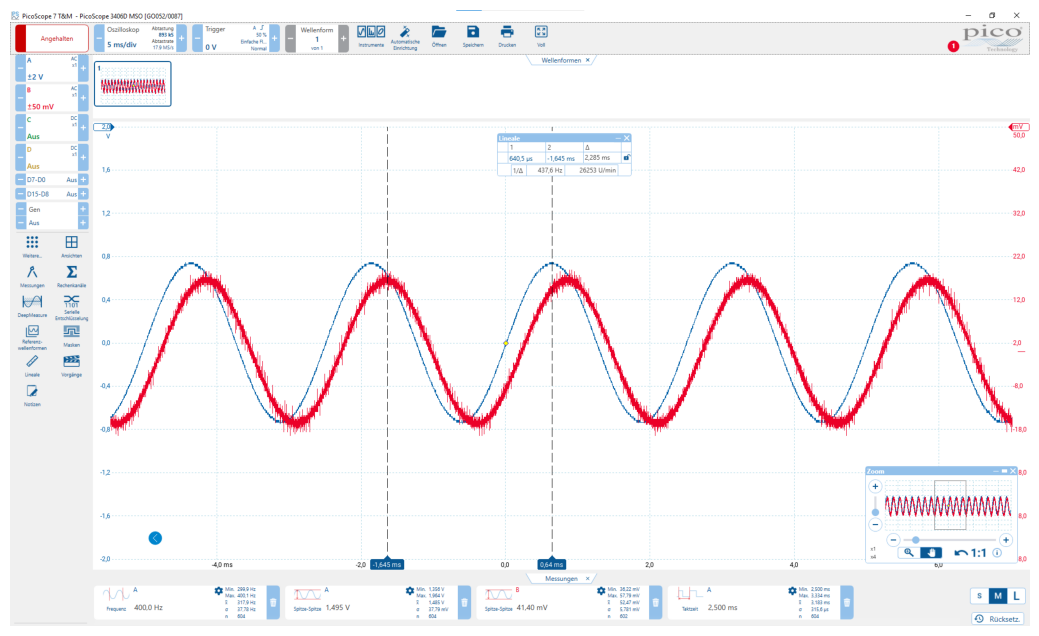

In [8]:
# Nr. 2

image1 = mpimg.imread("./MessungenVersuch3/Versuch 2/400hz.png")
plt.figure(figsize=(16, 8))
plt.axis(False)
plt.imshow(image1)


In [9]:
dataGross = {
    "Hz": [
    100, 200, 300, 400, 500, 700, 850,
    1000, 1200, 1500, 1700, 2000, 3000, 4000, 5000, 6000, 10000
    ],
    "Spitze-Spitze A": [1512., 1478, 1495., 1495., 1512., 1495., 1495., 1512., 1512., 1478., 1512., 1478., 1512., 1530., 1478., 1495., 1530.],
    "Spitze-Spitze B": [25.87, 78.05, 55.2, 41.4, 35.79, 25.87, 30.19, 33.64, 30.62, 27.6, 27.6, 28.03, 29.32, 34.5, 25.44, 29.32, 16.38],
    "Phasenverschiebung": [5049., 673.2, 3279 , 2285., 1755., 1240., 1049., 813.1, 640.1, 481.8, 415.6, 336.4, 194.7, 88.9, 37.37, 13.9, 36.45],
}




dfGross = pd.DataFrame(dataGross)

dfGross


,Hz,Spitze-Spitze A,Spitze-Spitze B,Phasenverschiebung
0,100,1512.0,25.87,5049.00
1,200,1478.0,78.05,673.20
2,300,1495.0,55.20,3279.00
3,400,1495.0,41.40,2285.00
4,500,1512.0,35.79,1755.00
5,700,1495.0,25.87,1240.00
6,850,1495.0,30.19,1049.00
7,1000,1512.0,33.64,813.10
8,1200,1512.0,30.62,640.10
9,1500,1478.0,27.60,481.80


In [10]:
dataKlein = {
    "Hz": [
    100, 200, 300, 400, 500, 700, 850,
    1000, 1200, 1500, 1700, 2000, 3000, 4000, 5000, 6000, 10000
    ],
    "Spitze-Spitze A": [1478, 1495, 1478, 1512, 1512, 1495, 1495, 1495, 1495, 1530, 1495, 1512, 1495, 1512, 1512, 1512, 1478],
    "Spitze-Spitze B": [11.64, 19.84, 26.74, 55.63, 90.13, 39.24, 32.34, 27.6, 25.44, 56.92, 27.17, 28.03, 27.6, 19.41, 21.56, 16.82, 16.39],
    "Phasenverschiebung": [6191, 2039, 1082, 595.9, 395.15, 1222, 982.84, 794.7, 651.1, 489.2, 411.9, 340.1, 180, 95.34, 48.41, 12.52, 45.65],
}

dfKlein = pd.DataFrame(dataKlein)

dfKlein

,Hz,Spitze-Spitze A,Spitze-Spitze B,Phasenverschiebung
0,100,1478,11.64,6191.00
1,200,1495,19.84,2039.00
2,300,1478,26.74,1082.00
3,400,1512,55.63,595.90
4,500,1512,90.13,395.15
5,700,1495,39.24,1222.00
6,850,1495,32.34,982.84
7,1000,1495,27.60,794.70
8,1200,1495,25.44,651.10
9,1500,1530,56.92,489.20


In [25]:
"""
plt.figure(figsize=(16, 8))
plt.plot(dataGross["Hz"], np.array(dataGross["Spitze-Spitze B"]) / 2., marker='o')
plt.title("Amplitudengang")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude (mV)")
plt.show()

plt.figure(figsize=(16, 8))
plt.plot(dataGross["Hz"], np.array(dataGross["Phasenverschiebung"]) / 1000., marker='o')
plt.title("Phasengang")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Phase (ms)")
plt.show()
"""

'\nplt.figure(figsize=(16, 8))\nplt.plot(dataGross["Hz"], np.array(dataGross["Spitze-Spitze B"]) / 2., marker=\'o\')\nplt.title("Amplitudengang")\nplt.xlabel("Frequenz (Hz)")\nplt.ylabel("Amplitude (mV)")\nplt.show()\n\nplt.figure(figsize=(16, 8))\nplt.plot(dataGross["Hz"], np.array(dataGross["Phasenverschiebung"]) / 1000., marker=\'o\')\nplt.title("Phasengang")\nplt.xlabel("Frequenz (Hz)")\nplt.ylabel("Phase (ms)")\nplt.show()\n'

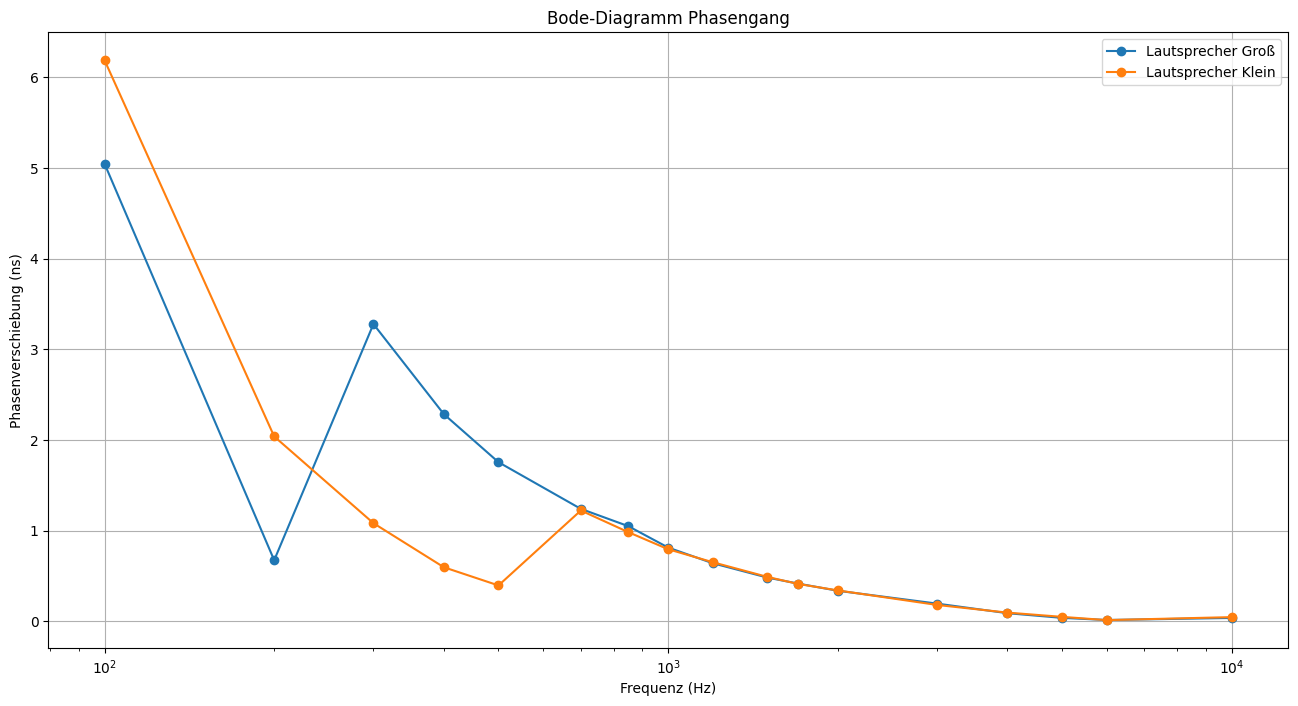

In [24]:


plt.figure(figsize=(16, 8))
plt.semilogx(dataGross["Hz"], np.array(dataGross["Phasenverschiebung"]) / 1000., marker='o', label="Lautsprecher Groß")
plt.semilogx(dataKlein["Hz"], np.array(dataKlein["Phasenverschiebung"]) / 1000., marker='o', label="Lautsprecher Klein")
plt.title("Bode-Diagramm Phasengang")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Phasenverschiebung (ns)")
plt.grid(True)
plt.legend()
plt.show()

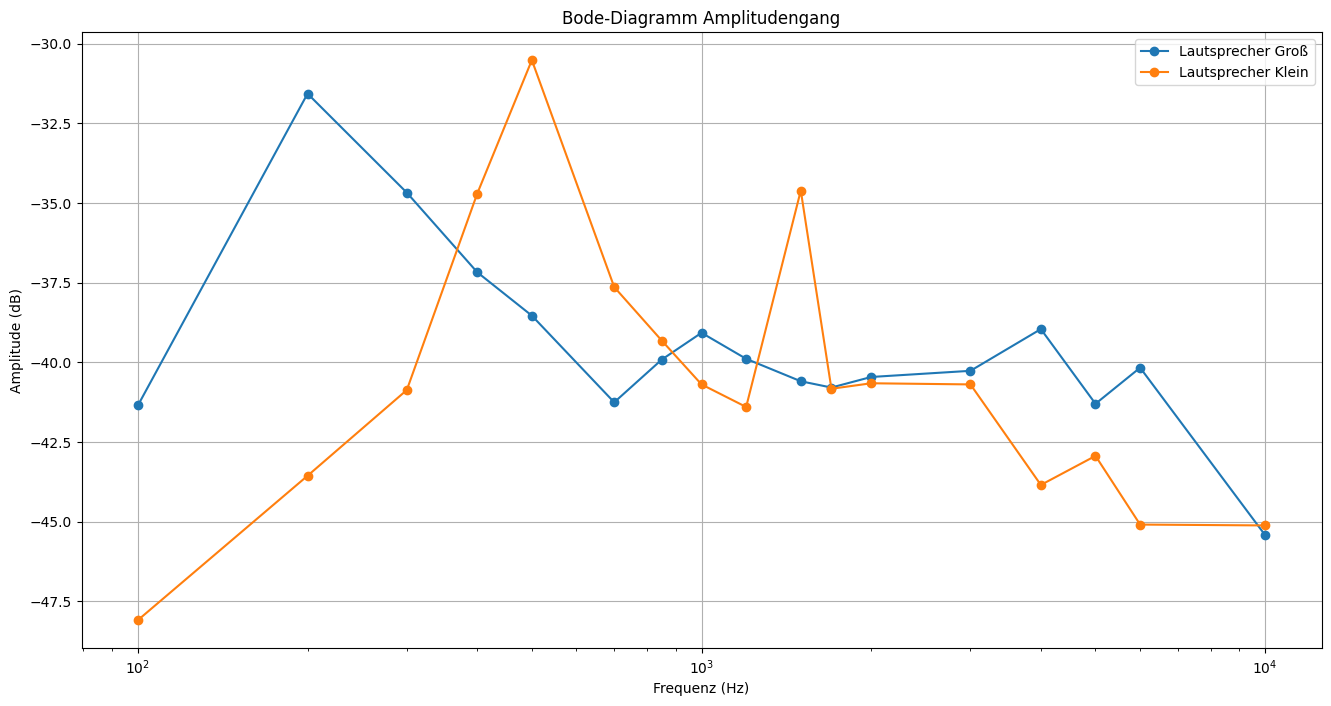

In [16]:
AoutG = np.array(dataGross["Spitze-Spitze B"]) / 2.
AinG = np.array(dataGross["Spitze-Spitze A"])
AoutK = np.array(dataKlein["Spitze-Spitze B"]) / 2.
AinK = np.array(dataKlein["Spitze-Spitze A"])

dBG = []
for i in range(len(AoutG)):
    dBG.append(20 * np.log10(AoutG[i] / AinG[i]))

dBK = []
for i in range(len(AoutK)):
    dBK.append(20 * np.log10(AoutK[i] / AinK[i]))

plt.figure(figsize=(16, 8))
plt.semilogx(dataGross["Hz"], dBG, marker='o', label="Lautsprecher Groß")
plt.semilogx(dataKlein["Hz"], dBK, marker='o', label="Lautsprecher Klein")
plt.title("Bode-Diagramm Amplitudengang")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid(True)
plt.legend()
plt.show()